# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [6]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

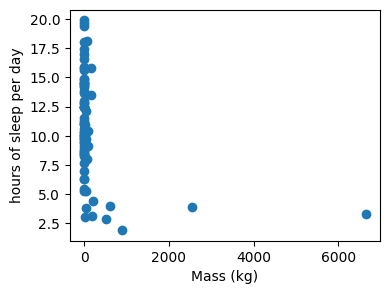

In [8]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [9]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

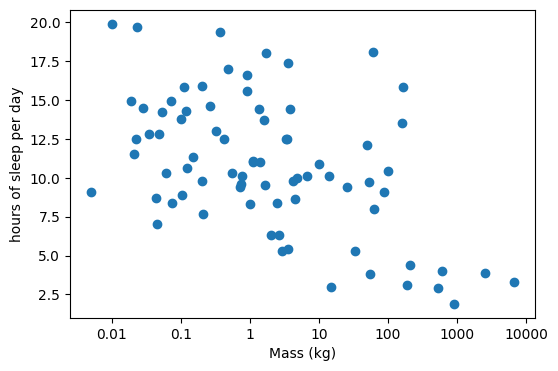

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

LinearModel(All Animals):
Slope: -1.6149691733776594
Intercept: 11.217396810788516
R-squared: 0.26432361005128435


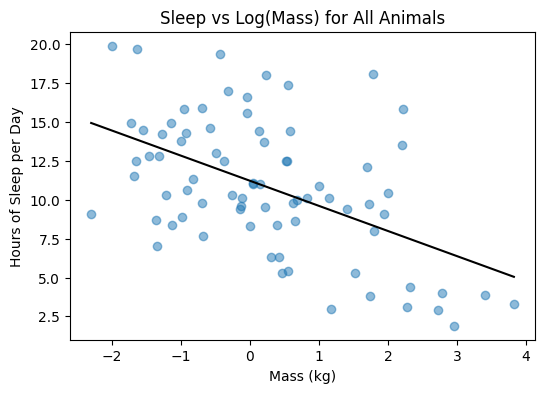

In [11]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):

# Calculate log10 of mass (if not already in data)
import numpy as np
df['log10_mass'] = np.log10(df['mass'])

# Create and fit the model
overall_model = LinearModel("All Animals")
overall_model.fit(x=df['log10_mass'], y=df['sleep'])

# Show model details
overall_model.print_model_info()

# Plot with data
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'], label="All Animals", alpha=0.5)
overall_model.plot_model(x_min=df['log10_mass'].min(), x_max=df['log10_mass'].max(), color='black')
plt.xlabel('Mass (kg)')
plt.ylabel('Hours of Sleep per Day')
plt.title("Sleep vs Log(Mass) for All Animals")
plt.show()









LinearModel(herbivore):
Slope: -2.2408355966298785
Intercept: 9.596484459635365
R-squared: 0.6255104280867234
LinearModel(omnivore):
Slope: -1.0841960083999436
Intercept: 11.662140158348944
R-squared: 0.10944681716489979
LinearModel(carnivore):
Slope: -0.14090226025203156
Intercept: 12.99704850696372
R-squared: 0.003186503413273978


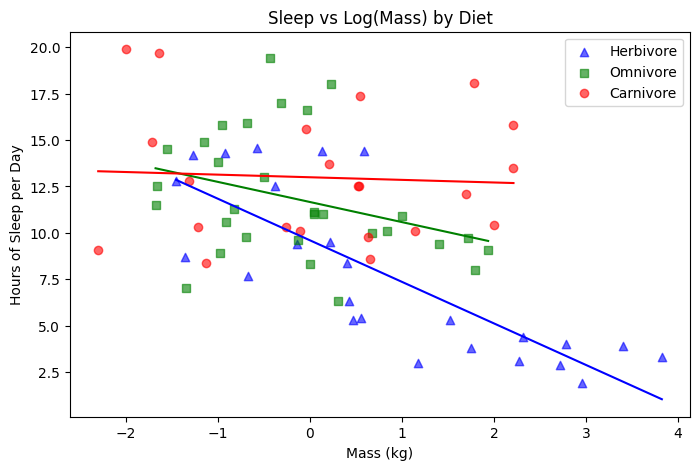

In [12]:
# Separate by diet
diets = df['diet'].unique()
colors = {'carnivore': 'red', 'omnivore': 'green', 'herbivore': 'blue'}
markers = {'carnivore': 'o', 'omnivore': 's', 'herbivore': '^'}

plt.figure(figsize=(8, 5))

for diet in diets:
    subset = df[df['diet'] == diet]
    model = LinearModel(diet)
    model.fit(subset['log10_mass'], subset['sleep'])
    model.print_model_info()
    plt.scatter(subset['log10_mass'], subset['sleep'], label=diet.title(), alpha=0.6, marker=markers[diet], color=colors[diet])
    model.plot_model(subset['log10_mass'].min(), subset['log10_mass'].max(), color=colors[diet])

plt.xlabel('Mass (kg)')
plt.ylabel('Hours of Sleep per Day')
plt.title("Sleep vs Log(Mass) by Diet")
plt.legend()
plt.show()
